# Imports

In [193]:
# %run '/content/drive/MyDrive/PYW EDA /imports.py'
# %run './imports.py'

In [194]:
######## imports for the clients, i.e., python scripts or jupyter notebooks

import pandas as pd  
import math
import numpy as np
import scipy.stats as stats
from datetime import datetime
import random
from time import perf_counter 
import statsmodels.api as sm
#random.seed(1)

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# notebook display
# https://github.com/ipython/ipykernel/issues/231
#%matplotlib notebook                             

# Insert path to core at front of python path
import sys
import os
# path_to_core = '../../server/core_code'                               # needs to be changed if we change file structure
# sys.path.insert(0, path_to_core); 
#print(sys.path)

### our functions
# import database_functions as dbf
# import functions_preproc as prp
# import functions_proc as pr
# import functions_postproc as pop

# database driver
import pymongo
from bson import ObjectId
from pprint import pprint

In [195]:
#df=pd.read_excel('/content/drive/MyDrive/PYW EDA /bases/AON_1B.xlsx')
df=pd.read_excel('./AON_1B.xlsx')
df.head()

,name,occupancy_count,day
0,Am Fin. Transformation,0,2020-08-31
1,Americas Finance,0,2020-08-31
2,Capital Markets,2,2020-08-31
3,CS,0,2020-08-31
4,CS Finance-43,0,2020-08-31


In [196]:
#df1=pd.read_excel('/content/drive/MyDrive/PYW EDA /bases/AON_1B.xlsx')
df1=pd.read_excel('./AON_1B.xlsx')
# df1.drop(["name"], axis = 1, inplace = True)
df1.head()

,name,occupancy_count,day
0,Am Fin. Transformation,0,2020-08-31
1,Americas Finance,0,2020-08-31
2,Capital Markets,2,2020-08-31
3,CS,0,2020-08-31
4,CS Finance-43,0,2020-08-31


In [197]:
# df2=pd.read_excel('/content/drive/MyDrive/PYW EDA /bases/boa.xlsx')
df2=pd.read_excel('./boa.xlsx')
df2.head()

,name,2019-12-02 00:00:00,2019-12-03 00:00:00,2019-12-04 00:00:00,2019-12-05 00:00:00,2019-12-09 00:00:00,2019-12-10 00:00:00,2019-12-11 00:00:00,2019-12-12 00:00:00,2019-12-16 00:00:00,...,2020-02-11 00:00:00,2020-02-12 00:00:00,2020-02-13 00:00:00,2020-02-18 00:00:00,2020-02-19 00:00:00,2020-02-20 00:00:00,2020-02-24 00:00:00,2020-02-25 00:00:00,2020-02-26 00:00:00,2020-02-27 00:00:00
0,S&C-PAD: REExecSvcs-PU,8,10,9,8,8,8,9,10,8,...,8,8,9,11,9,5,7,7,8,6
1,S&C-IHA: CTTreasBusTec-PU,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,S&C-IJM: CTGblLiqMgmt-PR,34,37,36,38,35,38,37,36,35,...,38,38,39,38,37,38,39,40,39,40
3,S&C-IHA: CTTreasBusTec-PU,3,3,3,3,3,1,2,3,3,...,4,4,4,4,4,4,3,3,4,4
4,S&C-IFZ: CTTreasFinIn-PU,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2


# Base 3

In [198]:
# df3=pd.read_csv('/content/drive/MyDrive/PYW EDA /bases/BaseVertical.csv')
#df3=pd.read_csv('/content/drive/MyDrive/python_datagen/data/BaseVertical.csv')
df3=pd.read_csv('./BaseVertical.csv')
df3.head()

,Unnamed: 0,SITE,DATE,OCCUPANCY_COUNT
0,0,S&C-PAD: REExecSvcs-PU,2018-01-01 01:00:00,14
1,1,S&C-PAD: REExecSvcs-PU,2018-01-01 02:00:00,7
2,2,S&C-PAD: REExecSvcs-PU,2018-01-01 03:00:00,13
3,3,S&C-PAD: REExecSvcs-PU,2018-01-01 04:00:00,7
4,4,S&C-PAD: REExecSvcs-PU,2018-01-01 05:00:00,7


In [199]:
dfn=pd.read_csv('./BaseVertical_original.csv')
dfn.head()

,Unnamed: 0,SITE,DATE,OCCUPANCY_COUNT
0,0,S&C-PAD: REExecSvcs-PU,2018-01-01 01:00:00,5
1,1,S&C-PAD: REExecSvcs-PU,2018-01-01 02:00:00,11
2,2,S&C-PAD: REExecSvcs-PU,2018-01-01 03:00:00,7
3,3,S&C-PAD: REExecSvcs-PU,2018-01-01 04:00:00,13
4,4,S&C-PAD: REExecSvcs-PU,2018-01-01 05:00:00,5


This line converts the dataset from horizontal to vertical 

In [200]:
df2 = df2.set_index('name').stack().reset_index().rename(columns={'level_1': 'day', 0: 'occupancy_count'})
df2.head()

,name,day,occupancy_count
0,S&C-PAD: REExecSvcs-PU,2019-12-02,8
1,S&C-PAD: REExecSvcs-PU,2019-12-03,10
2,S&C-PAD: REExecSvcs-PU,2019-12-04,9
3,S&C-PAD: REExecSvcs-PU,2019-12-05,8
4,S&C-PAD: REExecSvcs-PU,2019-12-09,8


In [201]:
df1=df1.groupby(['day']).sum()
df1.head()

,occupancy_count
day,
2020-08-31,47
2020-09-01,63
2020-09-02,64
2020-09-03,54
2020-09-04,22


# redindexar

In [202]:
'''
df1.index = df1.day
df1.drop(["day"], axis = 1, inplace = True) 
df1
'''

'\ndf1.index = df1.day\ndf1.drop(["day"], axis = 1, inplace = True) \ndf1\n'

In [203]:
df2.index = df2.day
df2.drop(["day"], axis = 1, inplace = True) 
df2.head()

,name,occupancy_count
day,,
2019-12-02,S&C-PAD: REExecSvcs-PU,8
2019-12-03,S&C-PAD: REExecSvcs-PU,10
2019-12-04,S&C-PAD: REExecSvcs-PU,9
2019-12-05,S&C-PAD: REExecSvcs-PU,8
2019-12-09,S&C-PAD: REExecSvcs-PU,8


In [204]:
df2=df2.groupby(['day']).sum()
df2.head()

,occupancy_count
day,
2019-12-02,2072
2019-12-03,2174
2019-12-04,2214
2019-12-05,2152
2019-12-09,2145


In [205]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694795 entries, 0 to 2694794
Data columns (total 4 columns):
Unnamed: 0         int64
SITE               object
DATE               object
OCCUPANCY_COUNT    int64
dtypes: int64(2), object(2)
memory usage: 82.2+ MB


In [206]:
df3.index = df3.DATE
df3.drop(["DATE"], axis = 1, inplace = True) 
df3.head()

,Unnamed: 0,SITE,OCCUPANCY_COUNT
DATE,,,
2018-01-01 01:00:00,0,S&C-PAD: REExecSvcs-PU,14
2018-01-01 02:00:00,1,S&C-PAD: REExecSvcs-PU,7
2018-01-01 03:00:00,2,S&C-PAD: REExecSvcs-PU,13
2018-01-01 04:00:00,3,S&C-PAD: REExecSvcs-PU,7
2018-01-01 05:00:00,4,S&C-PAD: REExecSvcs-PU,7


In [207]:
df3=df3.groupby(['DATE']).sum()
df3.head()

,Unnamed: 0,OCCUPANCY_COUNT
DATE,,
2018-01-01 01:00:00,0,1090
2018-01-01 02:00:00,107,1120
2018-01-01 03:00:00,214,1104
2018-01-01 04:00:00,321,1045
2018-01-01 05:00:00,428,1103


# union of the two bases

In [208]:

df=df2.append(df1,sort=True)
df.head()

,occupancy_count
day,
2019-12-02,2072
2019-12-03,2174
2019-12-04,2214
2019-12-05,2152
2019-12-09,2145


# Initial exploration 

Get empty values


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 2019-12-02 to 2020-12-11
Data columns (total 1 columns):
occupancy_count    118 non-null int64
dtypes: int64(1)
memory usage: 1.8 KB


In [210]:
df.isna().sum()

occupancy_count    0
dtype: int64

In [211]:
df.isnull().sum()

occupancy_count    0
dtype: int64

# Numeric variables

In [212]:
# nombre de columnas numéricas
numeric_variables = df._get_numeric_data().columns.values
numeric_variables

array(['occupancy_count'], dtype=object)

In [213]:
numeric_variables.shape[0]

1

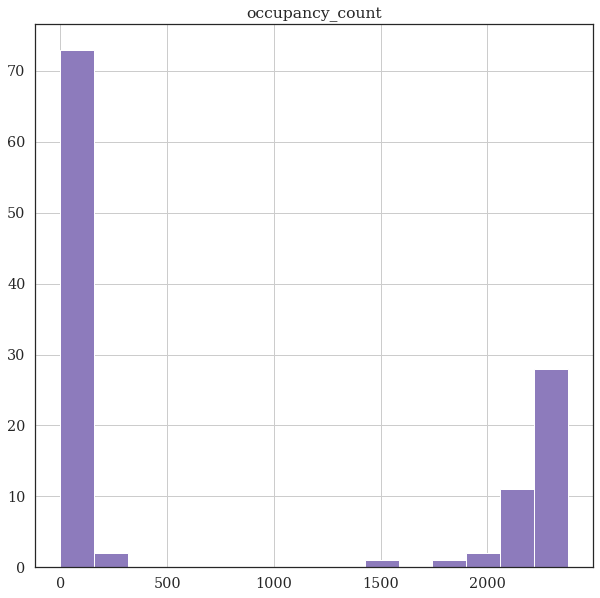

In [214]:

sns.set(style = 'white')
plt.rc('font', family='serif')


c_background = '#FFFFFF'

colours = ['#8D7BBC', '#60A561', '#EDAE49', '#D1495B', '#1E3231', '#00798C', '#30638E', '#003D5B' ]

#histograma de distribuciones
sns.set(style = 'white', font_scale=1.3)
plt.rc('font', family='serif')

df[numeric_variables].hist(bins = 15,
                           color = colours[0],
                           figsize = (10,10),
                           )
plt.show()



In [215]:
#df[numeric_variables].plot(kind='box', figsize=[16,8])

In [216]:
df['occupancy_count'].describe()

count     118.000000
mean      855.084746
std      1040.869505
min         0.000000
25%        68.250000
50%        97.000000
75%      2206.250000
max      2377.000000
Name: occupancy_count, dtype: float64

# *Normality*
 we can identify the outliers
 

In [217]:
def normalidad_variable_numerica(col):
    stats.probplot(df[col], plot=plt)
    plt.xlabel('Diagrama de Probabilidad(normal) de la variable {}'.format(col))
    plt.show()

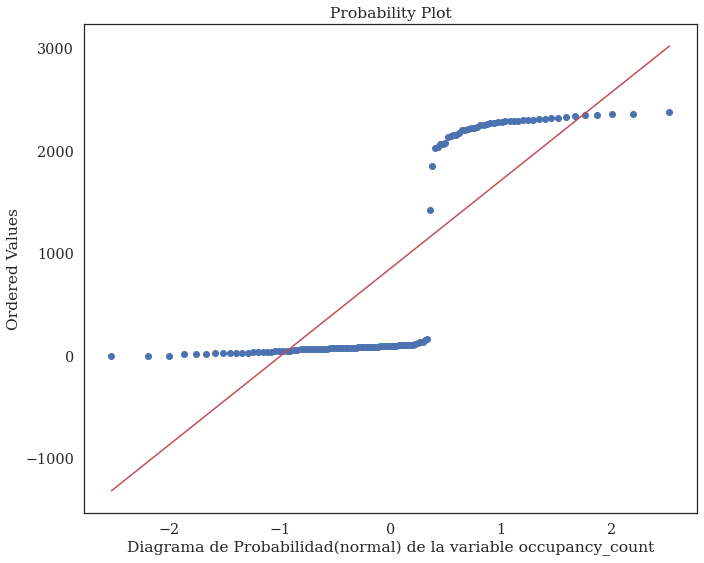

In [218]:
normalidad_variable_numerica('occupancy_count')

In [219]:
for num_col in numeric_variables:
    _, pval = stats.normaltest(df[num_col])
    if(pval < 0.05):
        print("Columna {} no sigue una distribución normal".format(num_col))

Columna occupancy_count no sigue una distribución normal


# Category variables


In [220]:
all_variables = df.columns.values
categorical_variables = np.setdiff1d( all_variables, numeric_variables )
categorical_variables

array([], dtype=object)

In [221]:
for i in df[categorical_variables].columns.values:
    print("Valores de ", i,'\n')
    print(df[i].value_counts())
    print('\n\n')

In [222]:
def distribucion_variable_categorica(col):
    df[col].value_counts(ascending=True,normalize=True).tail(20).plot.barh()
    plt.show()

In [223]:
# distribucion_variable_categorica('name')

# Variations by one unit time (day)

In [224]:
desplazado = df['occupancy_count'].shift(1)
desplazado[:5]

day
2019-12-02       NaN
2019-12-03    2072.0
2019-12-04    2174.0
2019-12-05    2214.0
2019-12-09    2152.0
Name: occupancy_count, dtype: float64

In [225]:
df['var_diaria']=df['occupancy_count'].pct_change()
df['var_diaria'][:5]

day
2019-12-02         NaN
2019-12-03    0.049228
2019-12-04    0.018399
2019-12-05   -0.028004
2019-12-09   -0.003253
Name: var_diaria, dtype: float64

## Applying the Hodrick-Prescott filter to separate in trend and
## cyclic component.


In [226]:
# Aplicando el filtro Hodrick-Prescott para separar en tendencia y 
# componente ciclico.
oc_ciclo, oc_tend = sm.tsa.filters.hpfilter(df['occupancy_count'])
df['oc_tend'] = oc_tend

In [227]:
# # calculando rendimiento acumulado diario
# rendimiento_diario=(1 + df['occupancy_count'].pct_change()).cumprod()
# df['rend_diario'] = rendimiento_diario
# df['rend_diario']

# Zeros,nan,null after calculations

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 2019-12-02 to 2020-12-11
Data columns (total 3 columns):
occupancy_count    118 non-null int64
var_diaria         117 non-null float64
oc_tend            118 non-null float64
dtypes: float64(2), int64(1)
memory usage: 3.7 KB


In [229]:
df.var_diaria[df.var_diaria==0].count()

2

In [230]:
df.oc_tend[df.oc_tend==0].count()

0

In [231]:
df.isna().sum()

occupancy_count    0
var_diaria         1
oc_tend            0
dtype: int64

In [232]:
df.isnull().sum()

occupancy_count    0
var_diaria         1
oc_tend            0
dtype: int64

# Visualizating

## Define date

In [261]:
df.tail()

,occupancy_count,var_diaria,oc_tend,prod_mov
day,,,,
2020-12-07,65,0.857143,53.436455,60.2
2020-12-08,68,0.046154,53.252431,60.4
2020-12-09,74,0.088235,53.078397,61.4
2020-12-10,68,-0.081081,52.899161,62.0
2020-12-11,41,-0.397059,52.712604,63.2


In [269]:
df.occupancy_count[df.occupancy_count<10]['2020-03':'2020-09'].count()

1

In [267]:
date='2020'
# date=['2020-03':'2020-09']

## Graphics of  occupancy_count BASE 1 Y 2

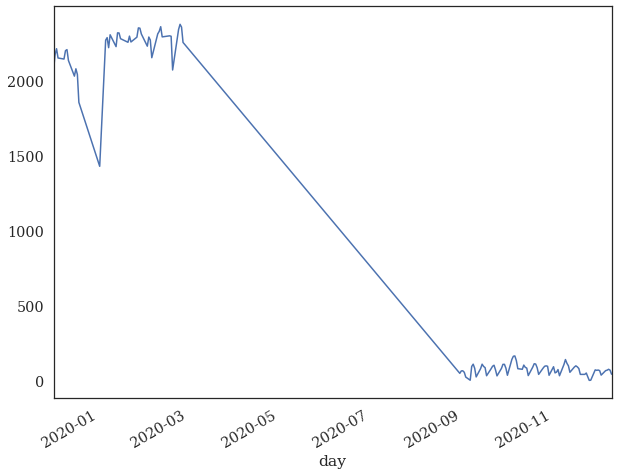

In [270]:
# graficando occupancy_count
plot = df['occupancy_count'].plot(figsize=(10, 8))
plt.show()

## Graphics of  occupancy_count BASE 1


In [272]:
df1

,occupancy_count
day,
2020-08-31,47
2020-09-01,63
2020-09-02,64
2020-09-03,54
2020-09-04,22
2020-09-07,1
2020-09-08,93
2020-09-09,108
2020-09-10,81


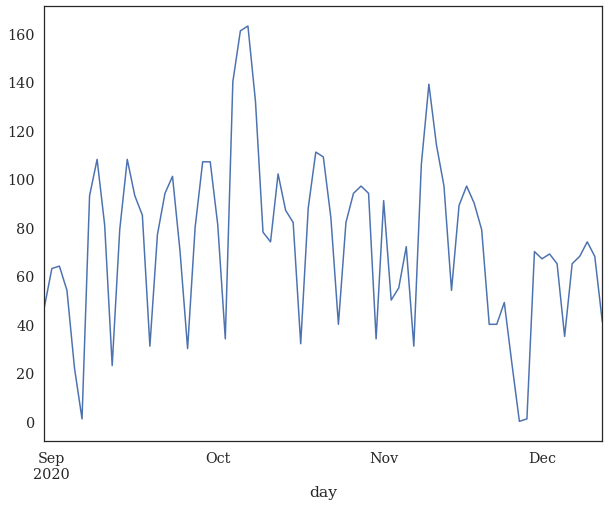

In [237]:
# graficando occupancy_count 
plot = df1['occupancy_count'].plot(figsize=(10, 8))
plt.show()

## Graphics of  occupancy_count BASE 2


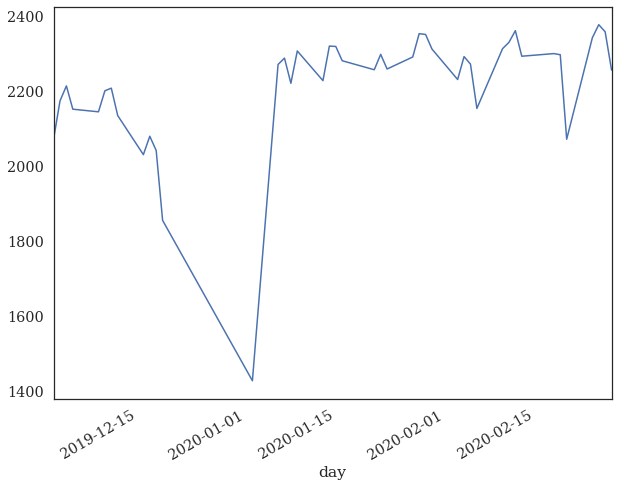

In [238]:
# graficando occupancy_count
plot = df2['occupancy_count'].plot(figsize=(10, 8))
plt.show()

In [239]:
df['occupancy_count']['2020-05':'2020-07']

Series([], Name: occupancy_count, dtype: int64)

In [240]:
'''
plot2 = df['occupancy_count']['2020-05':'2020-07'].plot(figsize=(10, 8))
plt.show()
'''

"\nplot2 = df['occupancy_count']['2020-05':'2020-07'].plot(figsize=(10, 8))\nplt.show()\n"

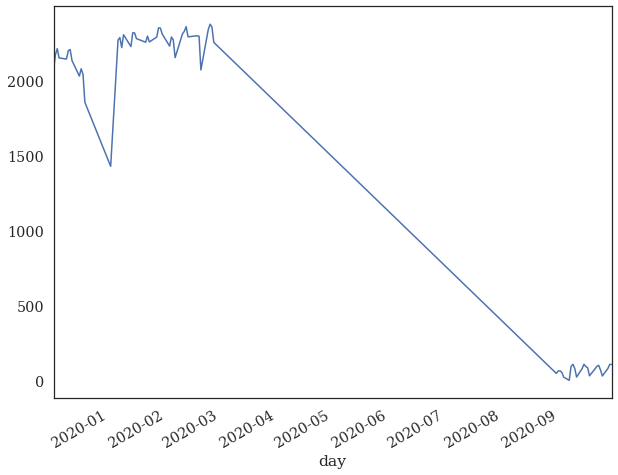

In [271]:
plot = df['occupancy_count']['2020-04':'2020-09'].plot(figsize=(10, 8))
plt.show()

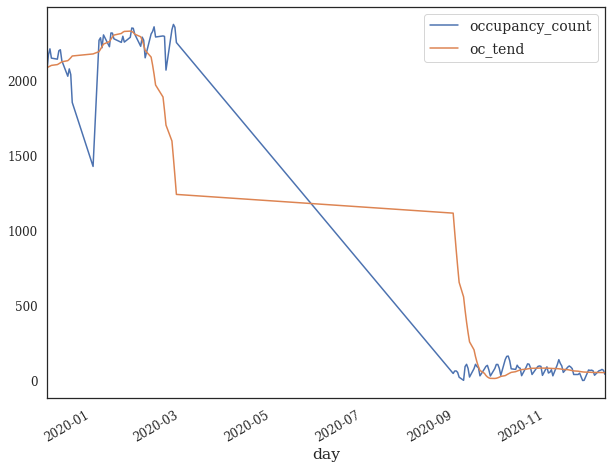

In [242]:
# graficando la variacion del precio real con la tendencia.
df[['occupancy_count','oc_tend']].plot(figsize=(10, 8), fontsize=12)
# df[date][['occupancy_count','oc_tend']].plot(figsize=(10, 8), fontsize=12);
# wft[['Adj Close', 'tend']].plot(figsize=(10, 8), fontsize=12);
legend = plt.legend()
legend.prop.set_size(14);

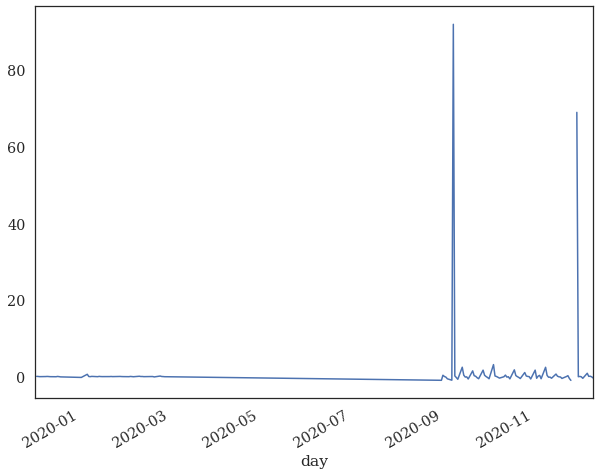

In [243]:
df['var_diaria'].plot(figsize=(10, 8))

# Base 3 per year 

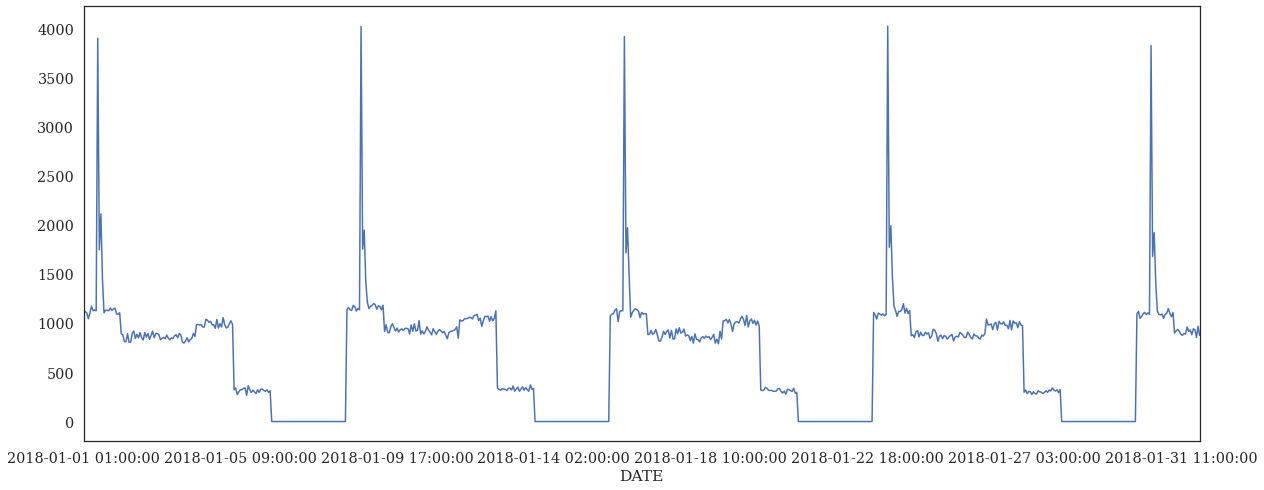

In [260]:
plot31 = df3.OCCUPANCY_COUNT['2018-01':'2018-02'].plot(figsize=(20, 8))
plt.show()

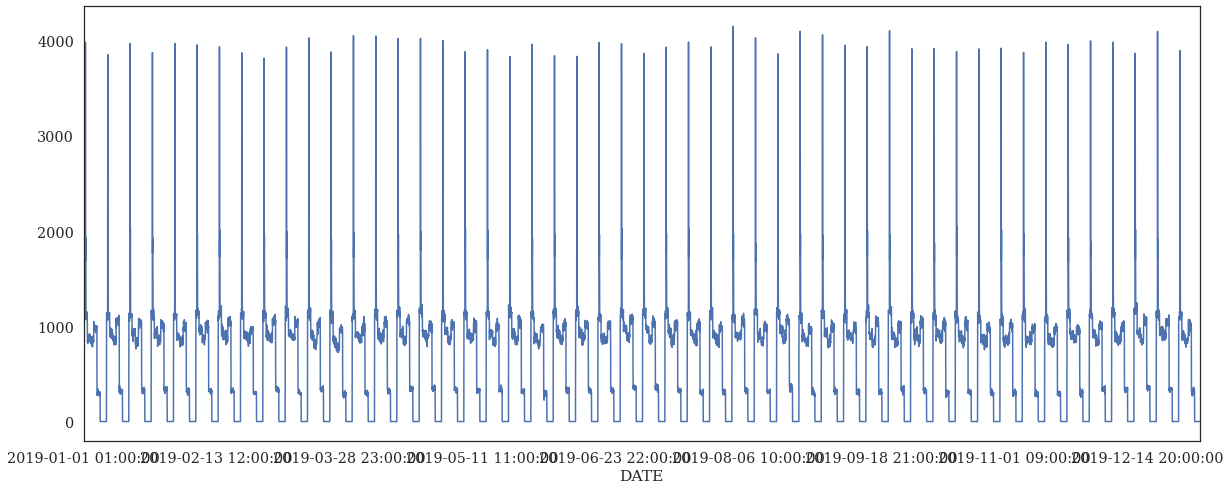

In [245]:
plot32 = df3.OCCUPANCY_COUNT['2019-01':'2020-01'].plot(figsize=(20, 8))
plt.show()

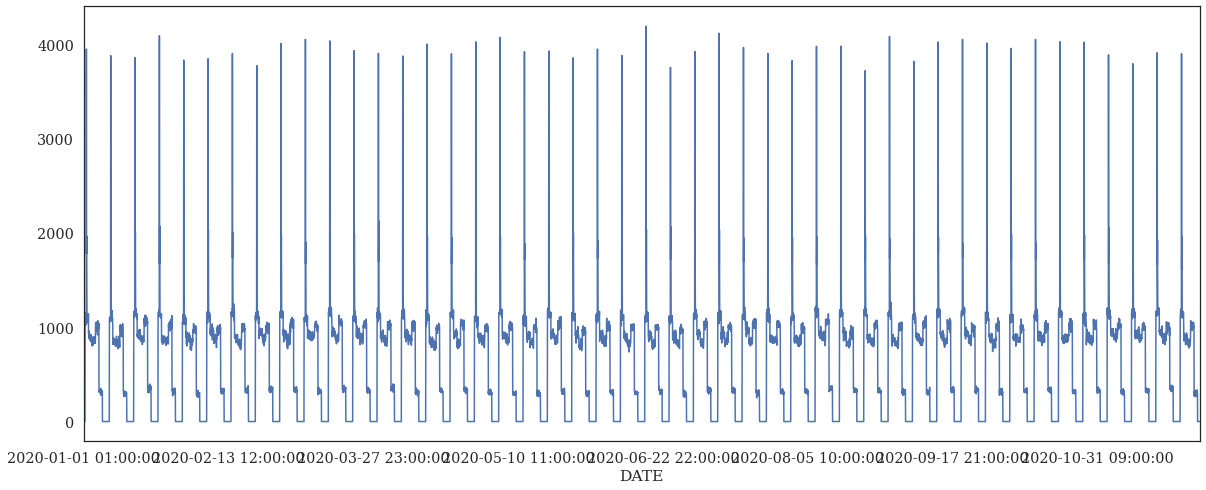

In [246]:
plot33 = df3.OCCUPANCY_COUNT['2020-01':'2020-12'].plot(figsize=(20, 8))
plt.show()

## Database3 decomposition by year

Time series decomposition every 30 days per semester

C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\59399\AppData\Loc

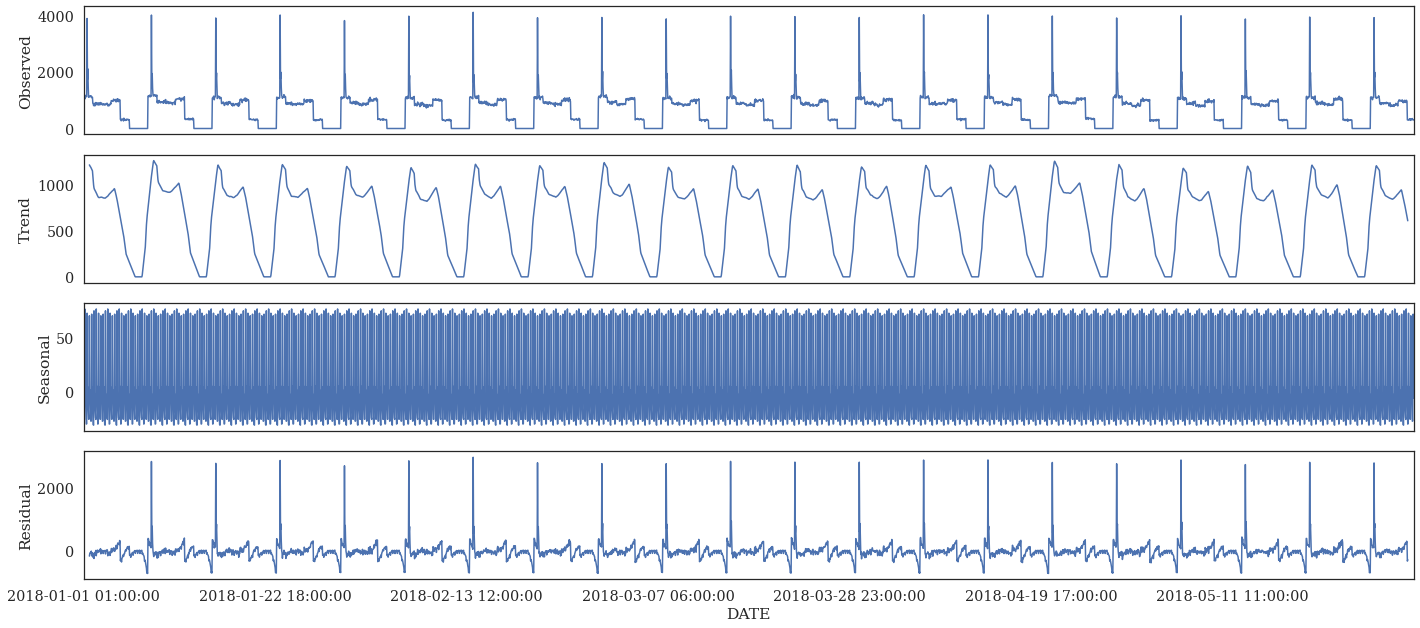

In [247]:
# Descomposición de serie de tiempo cada 30 dias por semestre 
from pylab import rcParams
rcParams['figure.figsize'] = 20, 9
descomposicion = sm.tsa.seasonal_decompose(df3.OCCUPANCY_COUNT['2018-01':'2018-06'],model='additive', freq=30)  
fig = descomposicion.plot()

C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\59399\AppData\Loc

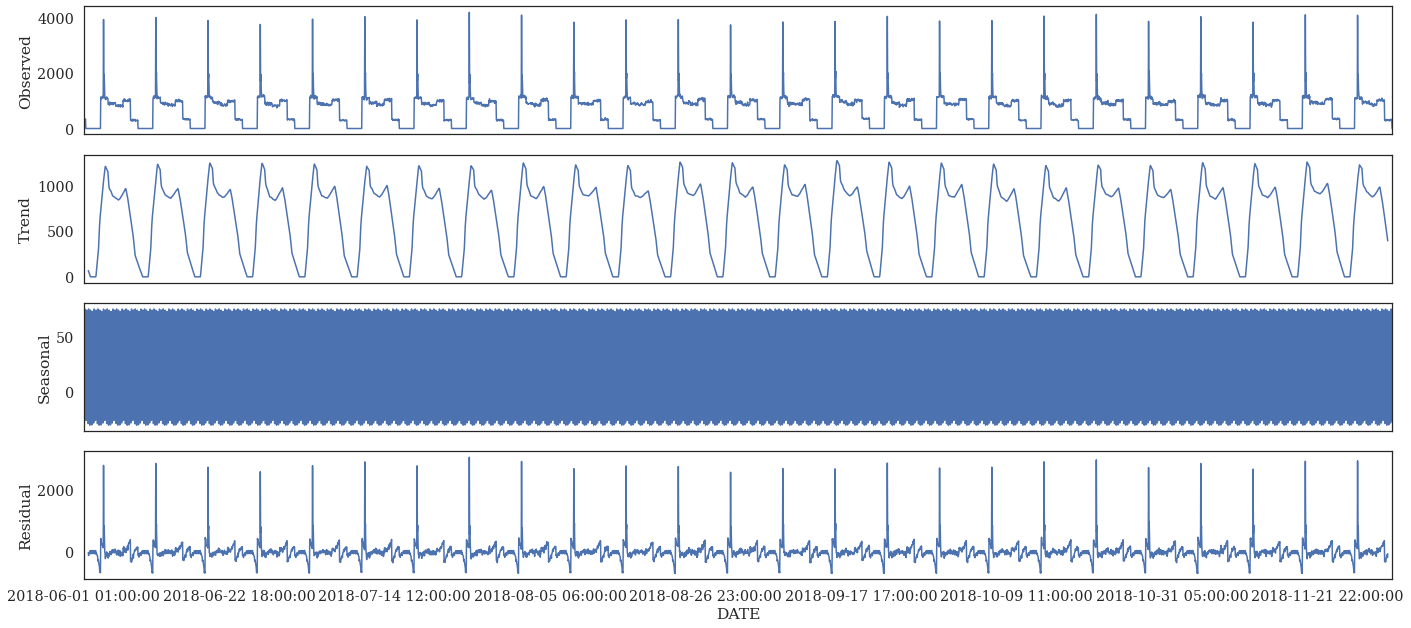

In [248]:
rcParams['figure.figsize'] = 20, 9
descomposicion = sm.tsa.seasonal_decompose(df3.OCCUPANCY_COUNT['2018-06':'2018-12'],model='additive', freq=30)  
fig = descomposicion.plot()

C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\59399\AppData\Loc

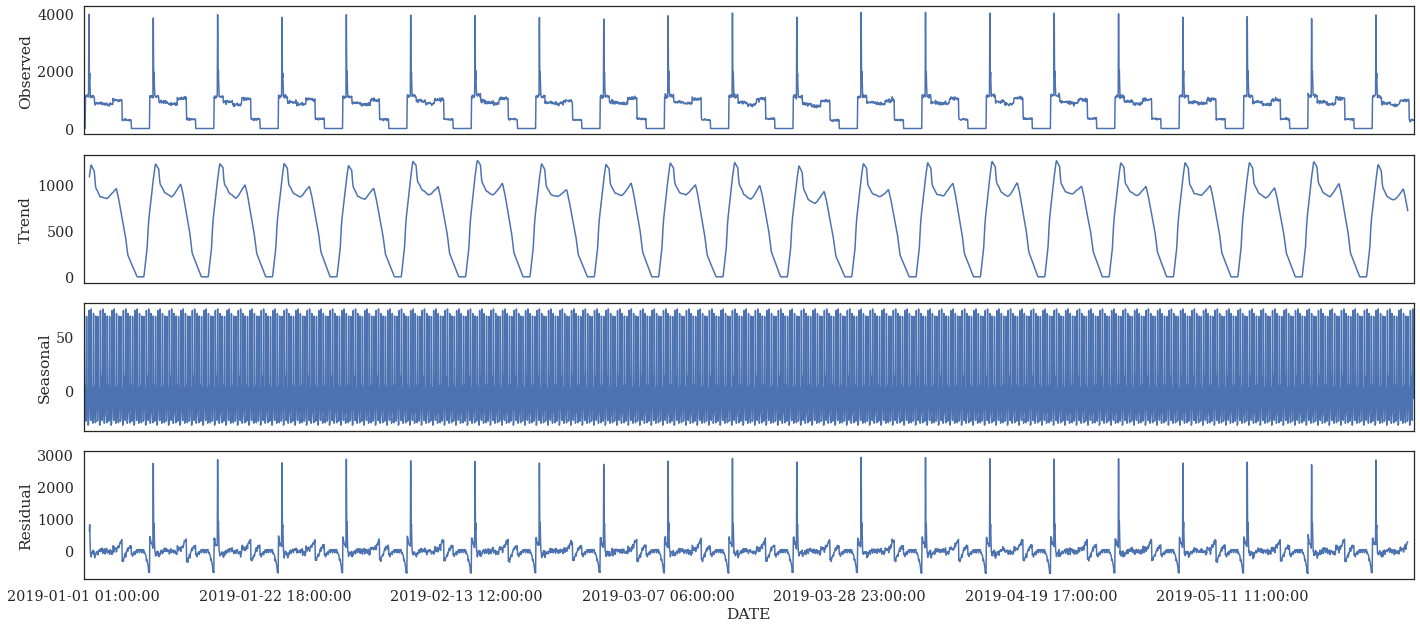

In [249]:
rcParams['figure.figsize'] = 20, 9
descomposicion = sm.tsa.seasonal_decompose(df3.OCCUPANCY_COUNT['2019-01':'2019-06'],model='additive', freq=30)  
fig = descomposicion.plot()

C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\59399\AppData\Loc

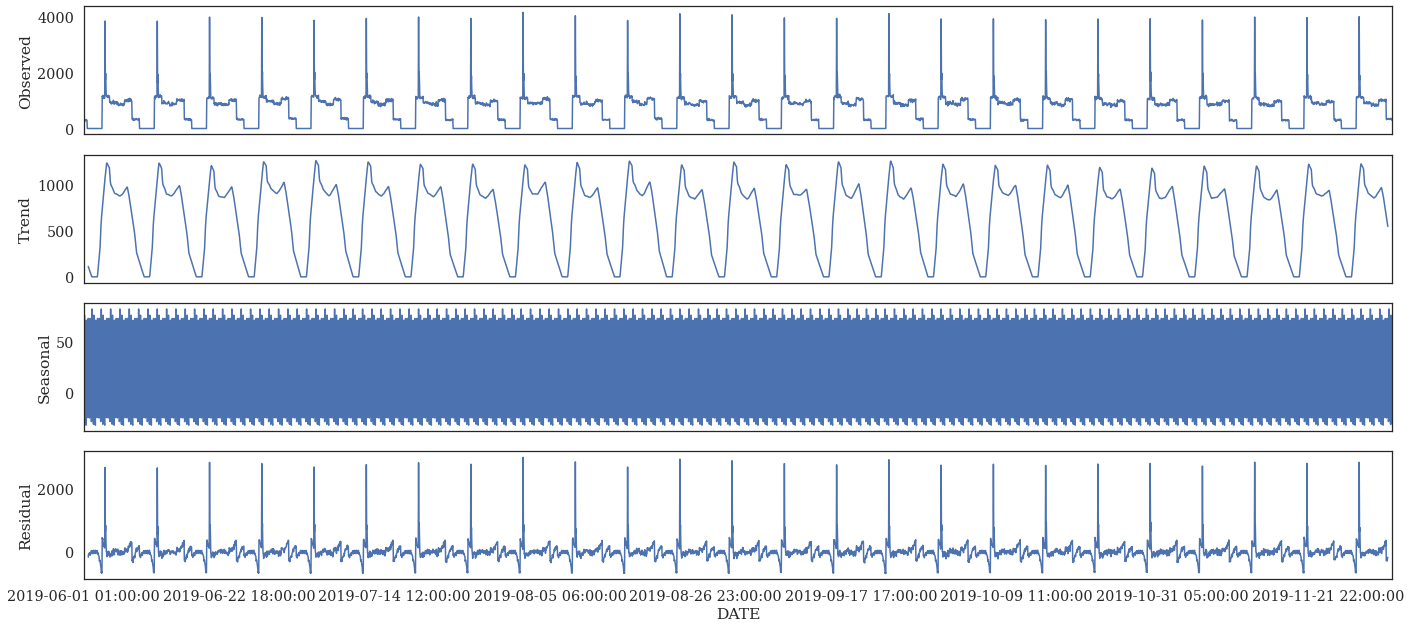

In [250]:
rcParams['figure.figsize'] = 20, 9
descomposicion = sm.tsa.seasonal_decompose(df3.OCCUPANCY_COUNT['2019-06':'2019-12'],model='additive', freq=30)  
fig = descomposicion.plot()

C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\59399\AppData\Loc

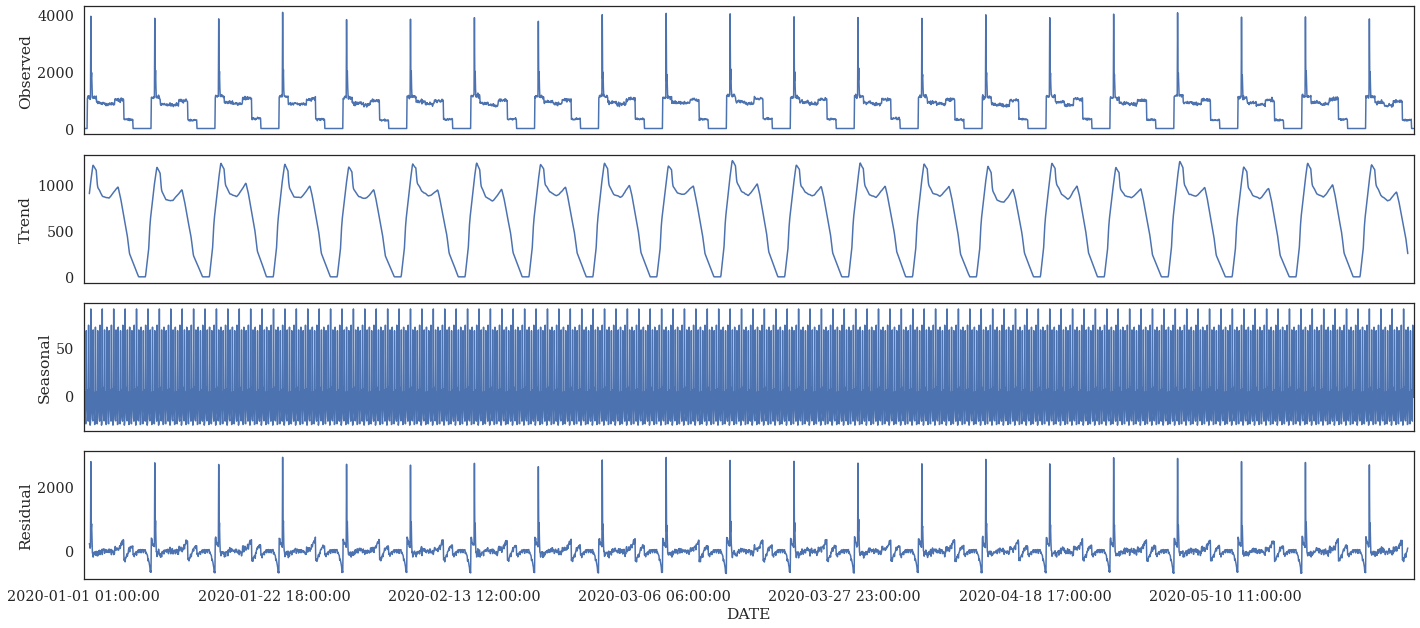

In [251]:
rcParams['figure.figsize'] = 20, 9
descomposicion = sm.tsa.seasonal_decompose(df3.OCCUPANCY_COUNT['2020-01':'2020-06'],model='additive', freq=30)  
fig = descomposicion.plot()

C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\59399\AppData\Loc

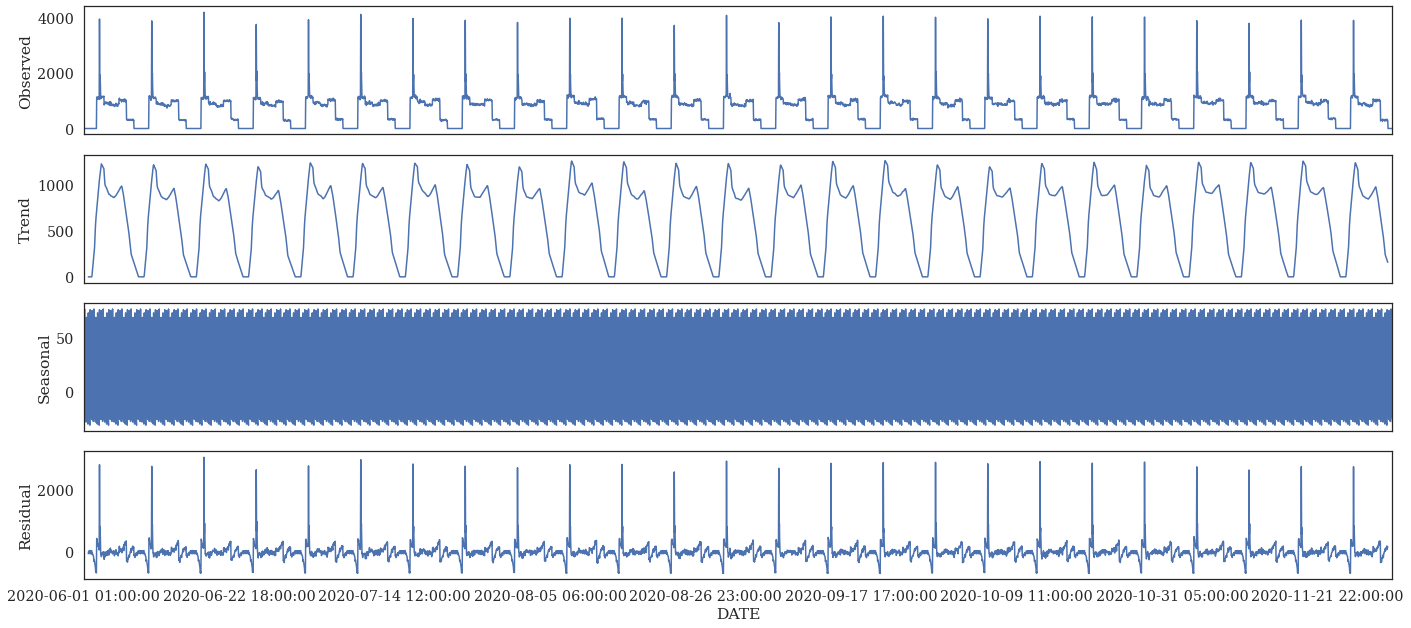

In [252]:
rcParams['figure.figsize'] = 20, 9
descomposicion = sm.tsa.seasonal_decompose(df3.OCCUPANCY_COUNT['2020-06':'2020-12'],model='additive', freq=30)  
fig = descomposicion.plot()

## Calculating moving averages every 5 days


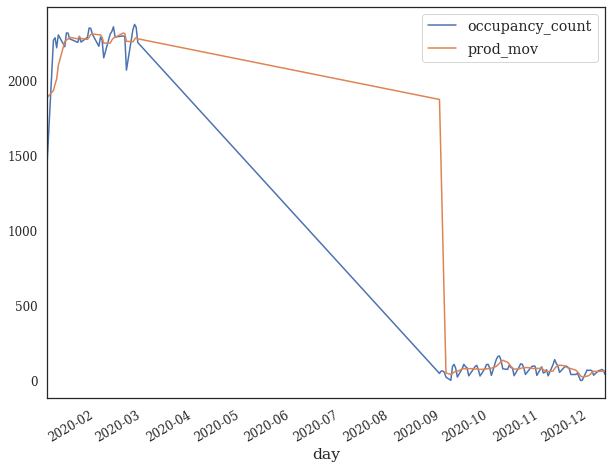

In [253]:
# Calculando promedios móviles cada 5 días
df_ma=df['occupancy_count'].rolling(5).mean()
df['prod_mov'] = df_ma
plot = df[date][['occupancy_count', 'prod_mov']].plot(figsize=(10, 8), fontsize=12)

## Time series (1 AND 2) decomposition every 30 days

C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\59399\AppData\Loc

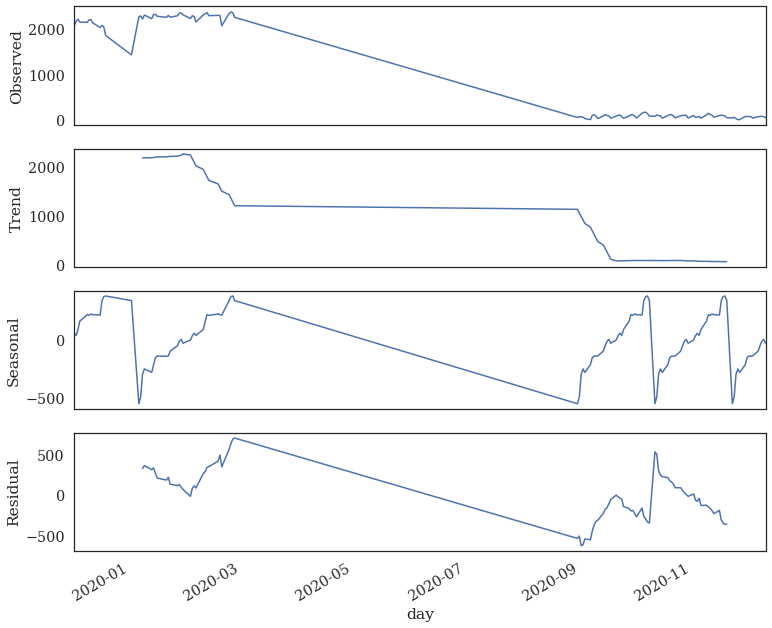

In [254]:
# Descomposición de serie de tiempo cada 30 dias
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

descomposicion = sm.tsa.seasonal_decompose(df['occupancy_count'],
                                                  model='additive', freq=30)  
fig = descomposicion.plot()

## Descomposición de serie 1

C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\59399\AppData\Loc

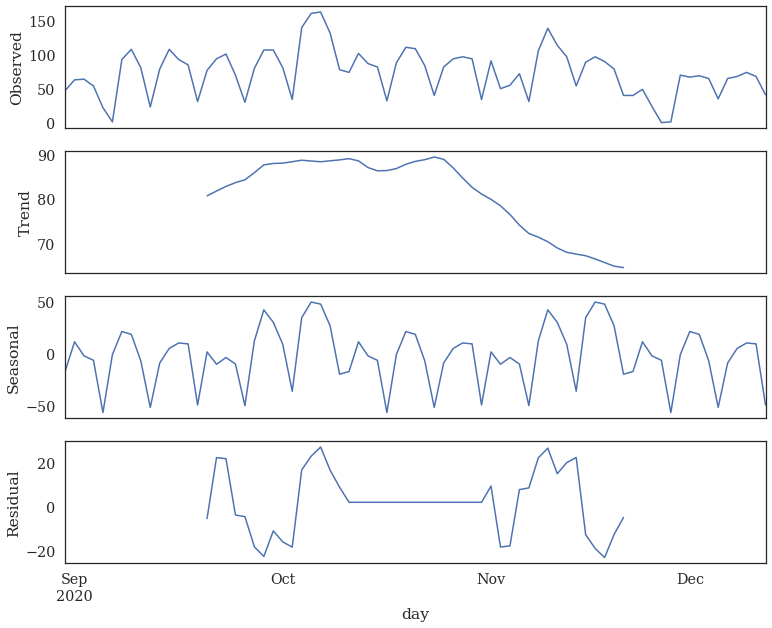

In [255]:
# Descomposición de serie de tiempo cada 30 dias
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

descomposicion = sm.tsa.seasonal_decompose(df1['occupancy_count'],
                                                  model='additive', freq=30)  
fig = descomposicion.plot()

## Descomposición de serie 2

C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\59399\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\59399\AppData\Loc

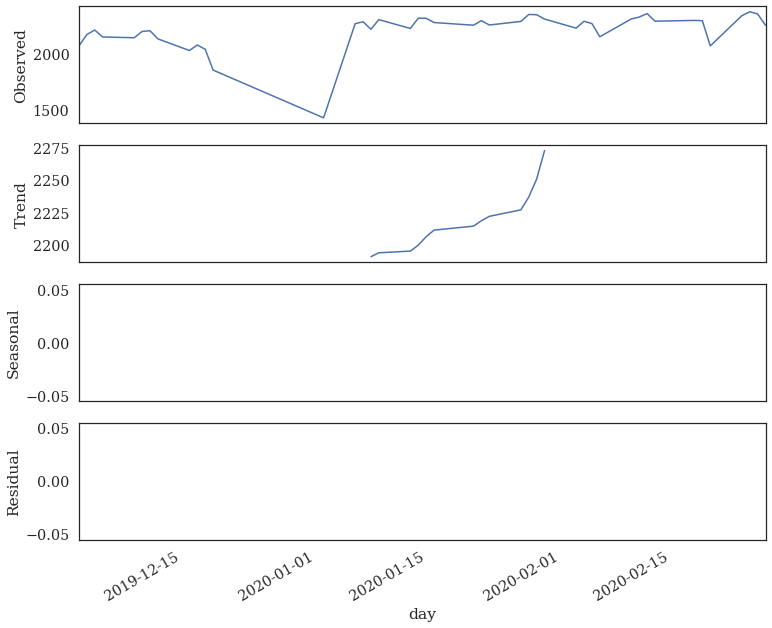

In [256]:
# Descomposición de serie de tiempo cada 30 dias
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

descomposicion = sm.tsa.seasonal_decompose(df2['occupancy_count'],
                                                  model='additive', freq=30)  
fig = descomposicion.plot()